Importing dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


Processing data

type = <class 'pandas.core.frame.DataFrame'>
type = <class 'pandas.core.frame.DataFrame'>
                       ds         y
0     2018-12-01 00:00:00  0.133313
1     2018-12-01 00:01:00  0.110806
2     2018-12-01 00:02:00  0.124452
3     2018-12-01 00:03:00  0.118742
4     2018-12-01 00:04:00  0.131906
...                   ...       ...
21473 2018-12-15 23:55:00  0.106519
21474 2018-12-15 23:56:00  0.112964
21475 2018-12-15 23:57:00  0.112500
21476 2018-12-15 23:58:00  0.119286
21477 2018-12-15 23:59:00  0.114500

[21478 rows x 2 columns]
ds    datetime64[ns]
y            float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object
                      ds         y
3143 2018-12-03 04:23:00  0.212944


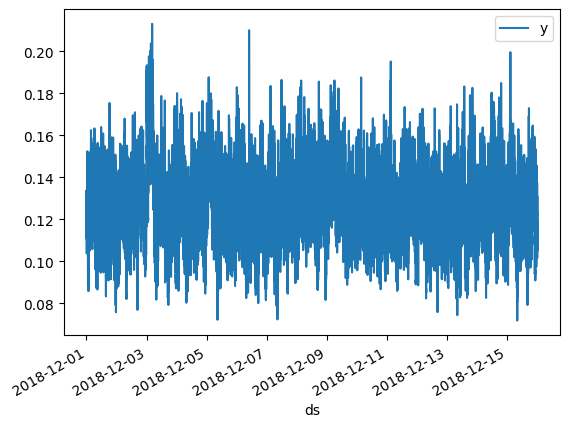

In [ ]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-12-01_2018-12-15_fa3b90233583fb6f4cf989f3ae38f295EDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
# data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
# data = data.loc[data['time_utc']<='2018-09-13 13:54:00']
# values = data[' svid'].value_counts()[:4].index.tolist()
# values = data[' svid'].value_counts()[:6]
# print(values)
# data = data[data[' svid'].isin(values)]
# data = data[data[' svid'] == 125]
data = data[['time_utc', ' s4']]
data.columns = ['ds', 'y']
data['y'] = data['y'].astype(float)
data.dropna(inplace=True)
print(f'type = {type(data)}')
data = data.groupby('ds', as_index=False).agg('mean')
print(f'type = {type(data)}')

print(data)
# data.reset_index(drop=True, inplace=True)
print(data.dtypes)
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d %H:%M:%S')
print(data.dtypes)

# print(data.dtypes)
# data = data[:1000]
# print(data)
# data = data[:50]

# train = data.loc[data['ds']<'2018-09-14 23:59:00']
# test = data.loc[data['ds']>='2018-09-14 23:59:00']
data.plot(x='ds', y='y')
# data.to_csv('/home/lemateus/TCC/cintilacao/only_125.csv')
data.interpolate('linear')
print(data[data['y'] == data['y'].max()])
# train

Train model

In [19]:
model = NeuralProphet(n_lags=10, drop_missing=True)#, impute_missing=True)
df_train, df_test = model.split_df(data, freq='min', valid_p = 0.074)

model.fit(df_train[['ds', 'y']], freq='min ', epochs=15 )

INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.986% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min
INFO - (NP.data.processing._handle_missing_data) - Added 122 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 122 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 40 NaN values in column y were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data) - More than 30 consecutive                             missing values encountered in column y. 82 NA remain after auto-imputation. 
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency mi

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (156) is too small than the required number                     for the learning rate finder (257). The results might not be optimal.
Finding best initial lr: 100%|██████████| 257/257 [00:02<00:00, 106.81it/s]
Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.


Training: |          | 0/? [00:23<?, ?it/s, v_num=23, train_loss=nan.0, reg_loss=0.000, MAE=nan.0, RMSE=nan.0, Loss=nan.0, RegLoss=0.000]


train_loss  reg_loss  MAE  RMSE  Loss  RegLoss  epoch
0          NaN       0.0  NaN   NaN   NaN      0.0      0
1          NaN       0.0  NaN   NaN   NaN      0.0      1
2          NaN       0.0  NaN   NaN   NaN      0.0      2
3          NaN       0.0  NaN   NaN   NaN      0.0      3
4          NaN       0.0  NaN   NaN   NaN      0.0      4
5          NaN       0.0  NaN   NaN   NaN      0.0      5
6          NaN       0.0  NaN   NaN   NaN      0.0      6
7          NaN       0.0  NaN   NaN   NaN      0.0      7
8          NaN       0.0  NaN   NaN   NaN      0.0      8
9          NaN       0.0  NaN   NaN   NaN      0.0      9
10         NaN       0.0  NaN   NaN   NaN      0.0     10
11         NaN       0.0  NaN   NaN   NaN      0.0     11
12         NaN       0.0  NaN   NaN   NaN      0.0     12
13         NaN       0.0  NaN   NaN   NaN      0.0     13
14         NaN       0.0  NaN   NaN   NaN      0.0     14

Predict the future

In [21]:
df_future = model.make_future_dataframe(df_train[['ds', 'y']], n_historic_predictions=True)



INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [22]:
forecast = model.predict(data[['ds', 'y']])
forecast
# plot1 = model.plot(future)  
# plot1

INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 
INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 


Predicting DataLoader 0: 100%|██████████| 17/17 [00:00<00:00, 28.08it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


ds      y     yhat1       ar1     trend  season_daily
0     2018-09-04 14:11:00  0.187       NaN       NaN       NaN           NaN
1     2018-09-04 14:12:00  0.193       NaN       NaN       NaN           NaN
2     2018-09-04 14:13:00  0.186       NaN       NaN       NaN           NaN
3     2018-09-04 14:14:00  0.168       NaN       NaN       NaN           NaN
4     2018-09-04 14:15:00  0.187       NaN       NaN       NaN           NaN
...                   ...    ...       ...       ...       ...           ...
16424 2018-09-15 23:55:00  0.165  0.161084  0.029859  0.150871     -0.019647
16425 2018-09-15 23:56:00  0.157  0.165331  0.034101  0.150877     -0.019647
16426 2018-09-15 23:57:00  0.153  0.163668  0.032354  0.150883     -0.019569
16427 2018-09-15 23:58:00  0.154  0.156865  0.025544  0.150889     -0.019569
16428 2018-09-15 23:59:00  0.154  0.153765  0.022279  0.150895     -0.019409

[16429 rows x 6 columns]

In [23]:
model.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


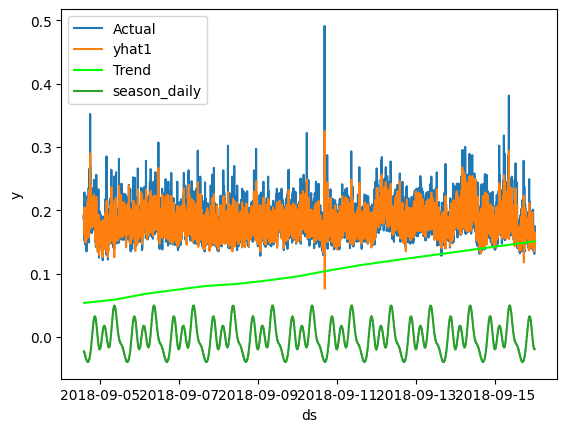

In [24]:
sns.lineplot(data=forecast, x='ds', y='y', label='Actual')
sns.lineplot(data=forecast, x='ds', y='yhat1', label='yhat1')
sns.lineplot(data=forecast, x='ds', y='trend', label='Trend', color='lime')
sns.lineplot(data=forecast, x='ds', y='season_daily', label='season_daily')
plt.show()

In [27]:
model.plot_parameters()

ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.


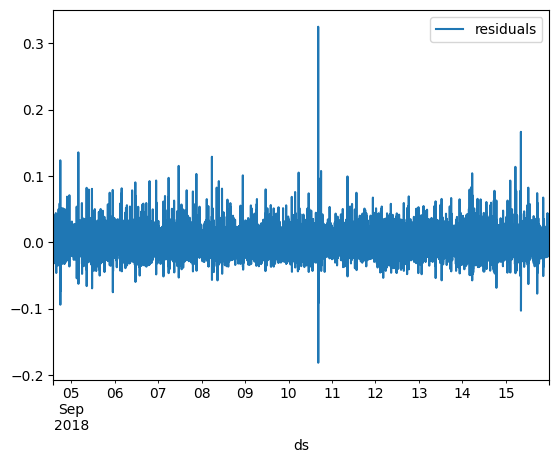

In [28]:
df_residuals = pd.DataFrame({'ds':data['ds'], 'residuals': data['y'] - forecast['yhat1']})
fig = df_residuals.plot(x='ds', y='residuals')

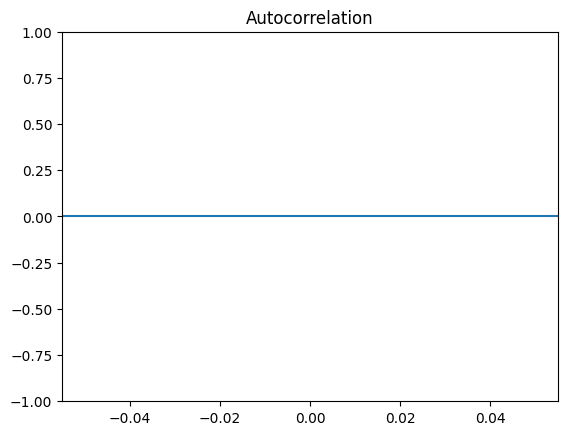

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals['residuals'], lags=50)